This is my final model training notebook

In [73]:
"""Import Libraries"""

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import radians
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

In [119]:
"""This is a function to load the dataset"""

def load_dataset():
    dataset = '../../data/properties_filtered.csv'
    df = pd.read_csv(dataset)
    return df

In [120]:
"""This is a function to define the categorical features and run them through OneHotEncoder"""

def ohe_data(df):
    ##Declare type feature
    column_type = df['type'].values
    ##Declare categorical features
    columns_ohe = ['province', 'district', 'postalCode', 'heatingType']
    ##Run OneHotEncoder
    ohe = OneHotEncoder()
    cat_ohe = ohe.fit_transform(df[columns_ohe]).toarray()
    ##Stack type with other categorical features
    cat_data = np.column_stack((column_type, cat_ohe))
    return cat_data

In [121]:
"""This is a function to merge categorical data run through OneHotEncoder with the other data features"""

def merge_data(df, cat_data):
    ##Declare non-categorical features
    columns_non_cat = ['latitude', 'longitude', 'constructionYear', 'buildingCondition', 'numberOfFrontages', 'livingArea', 'kitchenType', 'bedrooms', 'bedroom1Surface',
    'bedroom2Surface', 'bathrooms', 'toilets', 'energyConsumption', 'energyClass']
    non_cat = df[columns_non_cat].values
    ##Stack categorical and non-categorical features together
    X = np.column_stack((cat_data, non_cat))
    return X

In [122]:
"""This is a function to split the dataset into train and test sets""" 

def split_data(X, y):
    ##Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [123]:
"""This is a function to scale the features using StandardScaler"""

def scale_data(X_train, X_test):
    ##Declare instance of scaler
    sc = StandardScaler()
    ##Fit and transform data
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    return X_train, X_test

In [124]:
"""This is a function to declare a linear regression model then fit and evaluate it"""

def model_data_linear(X_train, X_test, y_train, y_test):
    ##Declare instance of model
    regressor = LinearRegression()
    ##Fit the model
    regressor.fit(X_train, y_train)
    train_score = regressor.score(X_train, y_train)
    ##Evaluate the model
    y_predict = regressor.predict(X_test)
    test_score = regressor.score(X_test, y_test)
    print(test_score)
    return y_predict

In [125]:
"""This is a function to declare a logistic regression model then fit and evaluate it"""

def model_data_logistic(X_train, X_test, y_train, y_test):
    ##Declare instance of model
    regressor = LogisticRegression(solver='liblinear')
    ##Fit the model
    regressor.fit(X_train, y_train)
    train_score = regressor.score(X_train, y_train)
    ##Evaluate the model
    y_predict = regressor.predict(X_test)
    test_score = regressor.score(X_test, y_test)
    print(test_score)
    return y_predict

In [126]:
"""This is a function to declare a KNN model then fit and evaluate it"""

def model_data_knn(X_train, X_test, y_train, y_test):
    ##Declare instance of model
    regressor = KNeighborsRegressor()
    ##Fit the model
    regressor.fit(X_train, y_train)
    train_score = regressor.score(X_train, y_train)
    ##Evaluate the model
    y_predict = regressor.predict(X_test)
    test_score = regressor.score(X_test, y_test)
    print(test_score)
    return y_predict

In [139]:
"""This is a function to scatter plot model prediction"""

def model_plot(y_predict, y_test):
    plt.scatter(y_predict, y_test, color='red')
    plt.xlabel('X_test')
    plt.ylabel('Price')
    plt.show()

-3.9289796415280125e+26


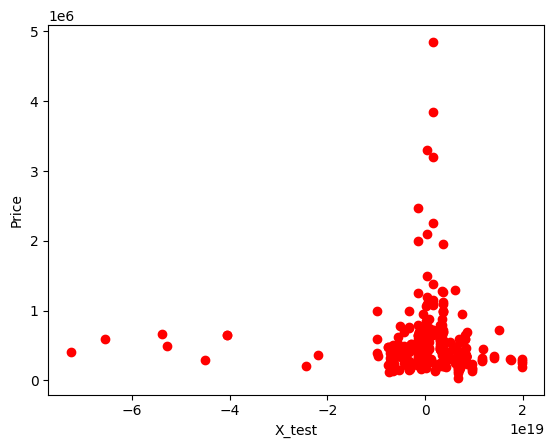

In [141]:
"""Linear Regression"""

df = load_dataset()
cat_data = ohe_data(df)
X = merge_data(df, cat_data)
y = df['price'].values
X_train, X_test, y_train, y_test = split_data(X,y)
X_train, X_test = scale_data(X_train, X_test)
y_predict = model_data_linear(X_train, X_test, y_train, y_test)
linear_plot = model_plot(y_predict, y_test)

0.087248322147651


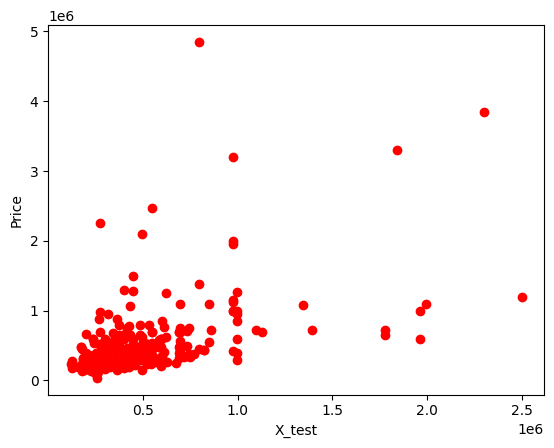

In [142]:
"""Logistic Regression"""

df = load_dataset()
cat_data = ohe_data(df)
X = merge_data(df, cat_data)
y = df['price'].values
X_train, X_test, y_train, y_test = split_data(X,y)
X_train, X_test = scale_data(X_train, X_test)
y_predict = model_data_logistic(X_train, X_test, y_train, y_test)
logistic_plot = model_plot(y_predict, y_test)

0.4438672333706922


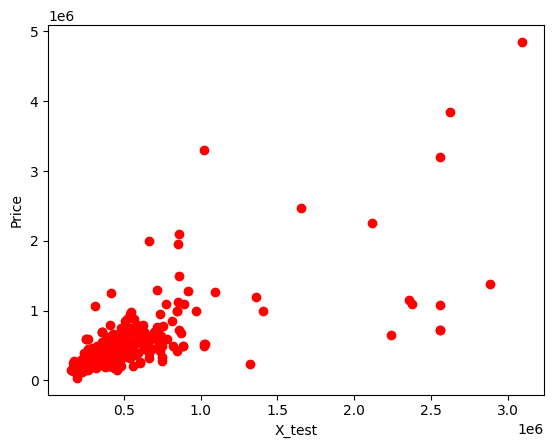

In [143]:
"""KNN Regression"""

df = load_dataset()
cat_data = ohe_data(df)
X = merge_data(df, cat_data)
y = df['price'].values
X_train, X_test, y_train, y_test = split_data(X,y)
X_train, X_test = scale_data(X_train, X_test)
y_predict = model_data_knn(X_train, X_test, y_train, y_test)
knn_plot = model_plot(y_predict, y_test)